## Imports

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
from data_processing import *

In [13]:
df_1, _ = get_clustered_data_with_bus_only('./data/SZP-2021-09-03.csv', crowding=[0,1])

Amount of invalid data: 2


In [14]:
import copy 
df_a = copy.deepcopy(df_1)

In [15]:
df = get_numeric_name(df_a, "Nazwa przystanku", drop=True)
df['Przystanek'] = df['Numeryczna Nazwa przystanku'] * 100 + df['Numer przystanku']

lines = split_into_lines(df, drop_line = True)


In [42]:
features = ['Numer taborowy', 'Godzina odjazdu', 'Godzina odjazdu przedział', 'Przystanek',  'Liczba wysiadających pasaz.', 'Liczba wsiadajacych pasaz.']
class_labels = ["class"]
regress_labels = ["Liczba pasaz. przed"]

### Logistic Regression 2 classes

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data_lines = dict()
for key, value in lines.items():
    data_lines[key] = get_train_and_test_for_lines(value, X_columns = features, y_columns = class_labels)

Accuracy score 0.8666332414138882
[[3453    5]
 [ 527    4]]


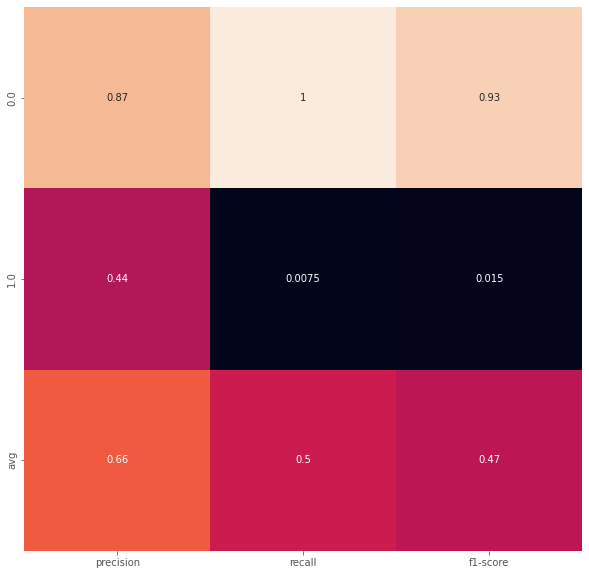

In [31]:
from sklearn.metrics import confusion_matrix

predicted = np.array([])
y_tests = np.array([])
for value in data_lines.values():
    X_train, X_test, y_train, y_test = value
    classifier = LogisticRegression(random_state = 0)  

    classifier.fit(X_train, np.ravel(y_train.T))

    predicted = np.concatenate((predicted, classifier.predict(X_test)), axis=0)
    y_tests = np.concatenate((y_tests, y_test.to_numpy().reshape(1,-1)[0]), axis=0)
err2 = accuracy_score(predicted, y_tests)

print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_tests, predicted)
print(confusion_matrix)
plot_classification_report(y_tests, predicted)

#### Oversampling

Accuracy score 0.5417397844071196
[[1837 1621]
 [ 207  324]]


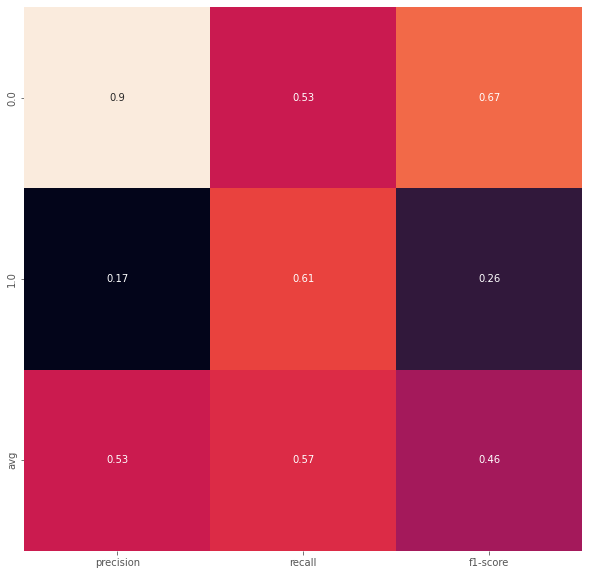

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix


predicted = np.array([])
y_tests = np.array([])

for value in data_lines.values():
    X_train, X_test, y_train, y_test = value

    os = SMOTE(random_state=0)
    columns = X_train.columns
    os_data_X,os_data_y=os.fit_resample(X_train, y_train)
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y = np.ravel(os_data_y.T)

    classifier = LogisticRegression(random_state = 0)  
    
    classifier.fit(os_data_X, np.ravel(os_data_y.T))
    predicted = np.concatenate((predicted, classifier.predict(X_test)), axis=0)
    y_tests = np.concatenate((y_tests, y_test.to_numpy().reshape(1,-1)[0]), axis=0)

err2 = accuracy_score(predicted, y_tests)

print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_tests, predicted)
print(confusion_matrix)
plot_classification_report(y_tests, predicted)

#### Undersampling

Accuracy score 0.47630985209325644
[[1530 1928]
 [ 161  370]]


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


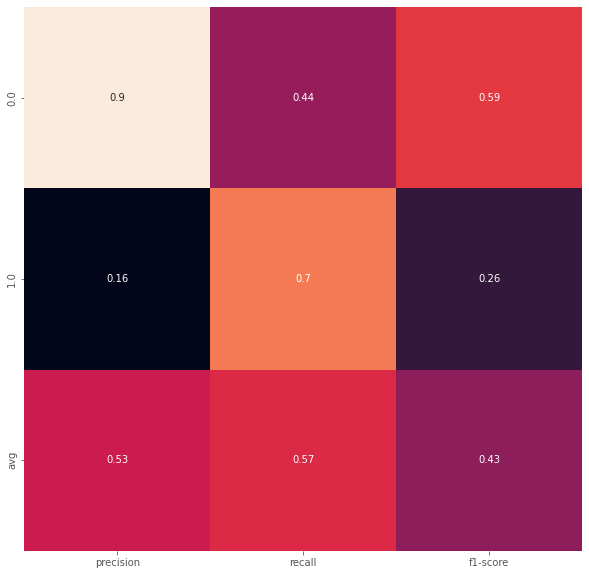

In [28]:
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix


predicted = np.array([])
y_tests = np.array([])
for value in data_lines.values():
    X_train, X_test, y_train, y_test = value

    undersample = NearMiss(version=3, n_neighbors_ver3=3)
    undersampled_x, undersampled_y = undersample.fit_resample(X_train, y_train)
    
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(undersampled_x, np.ravel(undersampled_y.T) )

    predicted = np.concatenate((predicted, classifier.predict(X_test)), axis=0)
    y_tests = np.concatenate((y_tests, y_test.to_numpy().reshape(1,-1)[0]), axis=0)

err2 = accuracy_score(predicted, y_tests)

print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_tests, predicted)
print(confusion_matrix)
plot_classification_report(y_tests, predicted)

### Logistic regression 3 classes

In [43]:
df_2, _ = get_clustered_data_with_bus_only('./data/SZP-2021-09-03.csv', crowding=[0,1,2])

Amount of invalid data: 2


In [44]:
import copy 
df_b = copy.deepcopy(df_2)

In [45]:
df2 = get_numeric_name(df_b, "Nazwa przystanku", drop=True)
df2['Przystanek'] = df2['Numeryczna Nazwa przystanku'] * 100 + df2['Numer przystanku']

lines2 = split_into_lines(df2, drop_line = True)


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
features = ['Numer taborowy', 'Godzina odjazdu', 'Godzina odjazdu przedział', 'Przystanek']
class_labels = ["class"]
regress_labels = ["Liczba pasaz. przed"]

#### Default input data

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data_lines2 = dict()
for key, value in lines2.items():
    data_lines2[key] = get_train_and_test_for_lines(value, X_columns = features, y_columns = class_labels)

Accuracy score 0.6472800200551516
[[2351  188    0]
 [1052  231    0]
 [ 102   65    0]]


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


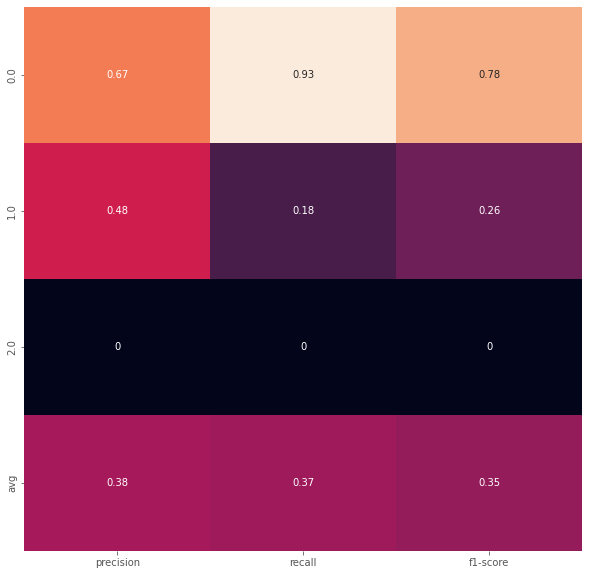

In [68]:
from sklearn.metrics import confusion_matrix

predicted2 = np.array([])
y_tests2 = np.array([])
for value in data_lines2.values():
    X_train, X_test, y_train, y_test = value
    classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs') 

    classifier.fit(X_train, np.ravel(y_train.T))

    predicted2 = np.concatenate((predicted2, classifier.predict(X_test)), axis=0)
    y_tests2 = np.concatenate((y_tests2, y_test.to_numpy().reshape(1,-1)[0]), axis=0)
err2 = accuracy_score(predicted2, y_tests2)

print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_tests2, predicted2)
print(confusion_matrix)
plot_classification_report(y_tests2, predicted2)

#### Oversampling

Accuracy score 0.32815241915266985
[[ 833  690 1016]
 [ 364  396  523]
 [  56   31   80]]


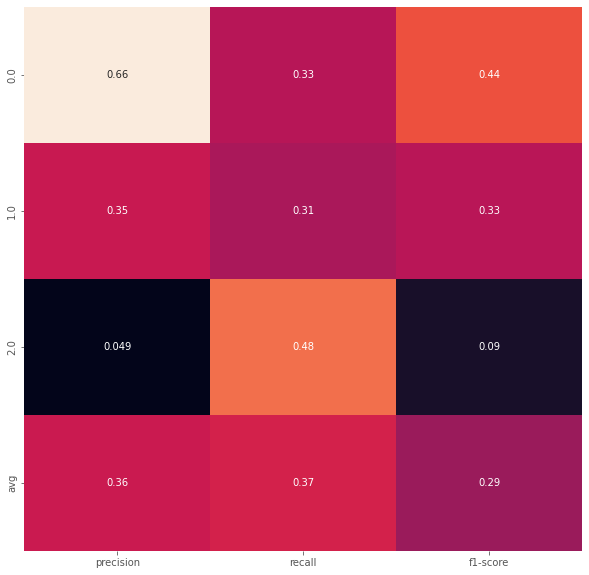

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix


predicted2 = np.array([])
y_tests2 = np.array([])

for value in data_lines2.values():
    X_train, X_test, y_train, y_test = value

    os = SMOTE(random_state=0)
    columns = X_train.columns
    os_data_X,os_data_y=os.fit_resample(X_train, y_train)
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y = np.ravel(os_data_y.T)

    classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs') 
    
    classifier.fit(os_data_X, np.ravel(os_data_y.T))
    predicted2 = np.concatenate((predicted2, classifier.predict(X_test)), axis=0)
    y_tests2 = np.concatenate((y_tests2, y_test.to_numpy().reshape(1,-1)[0]), axis=0)

err2 = accuracy_score(predicted2, y_tests2)

print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_tests2, predicted2)
print(confusion_matrix)
plot_classification_report(y_tests2, predicted2)

#### Undersampling

Accuracy score 0.32013035848583604
[[ 889  446 1204]
 [ 364  294  625]
 [  12   61   94]]


C:\Users\Alicja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


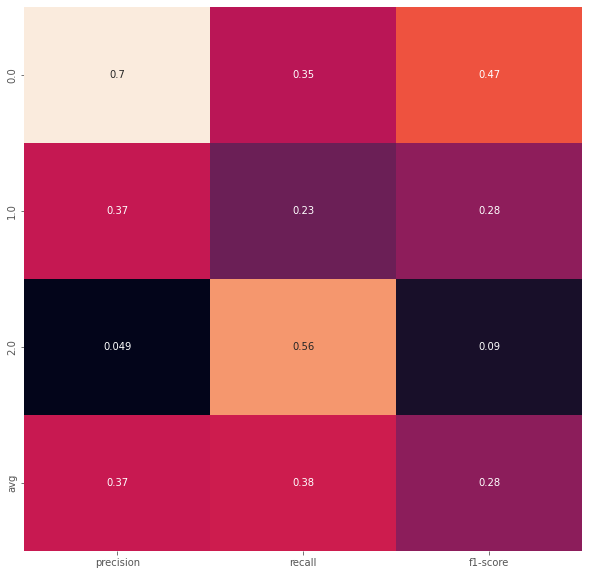

In [70]:
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix


predicted2 = np.array([])
y_tests2 = np.array([])
for value in data_lines2.values():
    X_train, X_test, y_train, y_test = value

    undersample = NearMiss(version=3, n_neighbors_ver3=3)
    undersampled_x, undersampled_y = undersample.fit_resample(X_train, y_train)
    
    classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs') 
    classifier.fit(undersampled_x, np.ravel(undersampled_y.T) )

    predicted2 = np.concatenate((predicted2, classifier.predict(X_test)), axis=0)
    y_tests2 = np.concatenate((y_tests2, y_test.to_numpy().reshape(1,-1)[0]), axis=0)

err2 = accuracy_score(predicted2, y_tests2)

print(f"Accuracy score {err2}")
confusion_matrix = confusion_matrix(y_tests2, predicted2)
print(confusion_matrix)
plot_classification_report(y_tests2, predicted2)